## The Sparks Foundation: Data Science and Business Analyst Intern
### Author : Aakash Khair 

### Task 4: Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

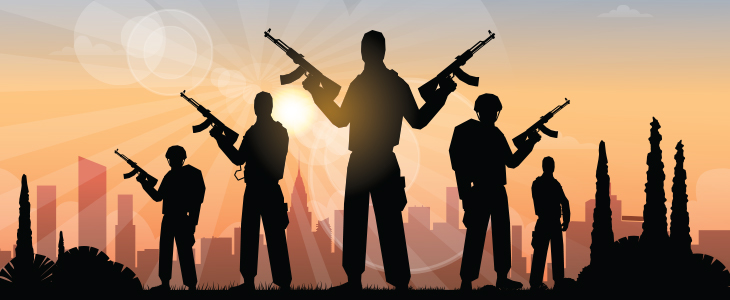

## Importing Libraries Required and the Dataset (CSV) File

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
terror_df = pd.read_csv("F:/Study Material/GRIP Data Analyst Internship/globalterrorismdb_0718dist.csv",engine='python')
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Cleaning our Data and Preparing our Data for Analysis

In [3]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:

terror_df.columns = terror_df.columns.str.replace('_','') # This is used to strip the "_" from the column label

terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','countrytxt':'Country','regiontxt':'Region','city':'City','attacktype1txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1txt':'TargetType','weaptype1txt':'WeaponType','motive':'Motive'},inplace=True)
terror_df=terror_df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','TargetType','WeaponType','Motive']]
terror_df['Casualities']=terror_df['Killed']+terror_df['Wounded']
terror_df.head(3) 

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [17]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  TargetType   181691 non-null  object 
 15  WeaponType   181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  Casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [5]:
terror_df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Checking The missing Values

In [6]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
City              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
TargetType          0
WeaponType          0
Motive         131130
Casualities     16874
dtype: int64

In [7]:
terror_df['City'].fillna('No Record', inplace=True)
terror_df.duplicated().sum()

print('No. of rows before dropping nulls: {}'.format(terror_df['Year'].count()))
# Remove of duplicates values
terror_df.drop_duplicates(keep=False,inplace=True)
print('No. of rows after dropping nulls: {}'.format(terror_df['Year'].count()))


No. of rows before dropping nulls: 181691
No. of rows after dropping nulls: 169019


## Overall analysis of Global Terrorism

In [8]:
print('Country with Highest Terrorist Attacks:',terror_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror_df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror_df['Killed'].max(),'that took place in',terror_df.loc[terror_df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


## Number of Terrorist Attacks Each Year

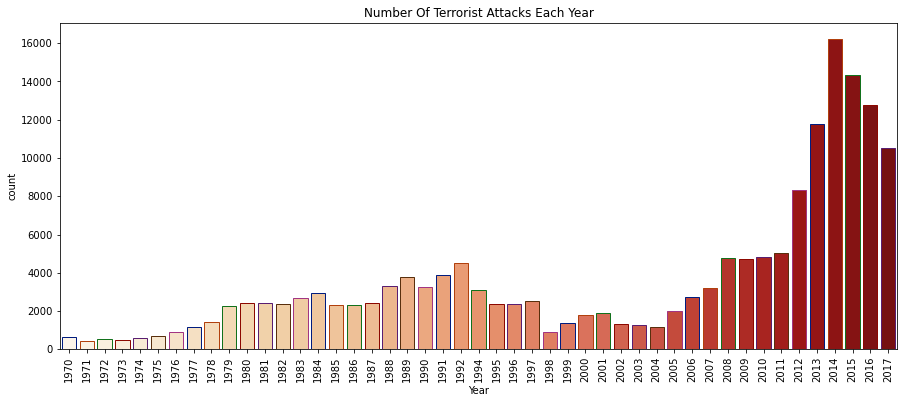

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='OrRd',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

## We can clearly see that the attacks have been increased after the 2005 sharply

## Terrorist Attacks by Country

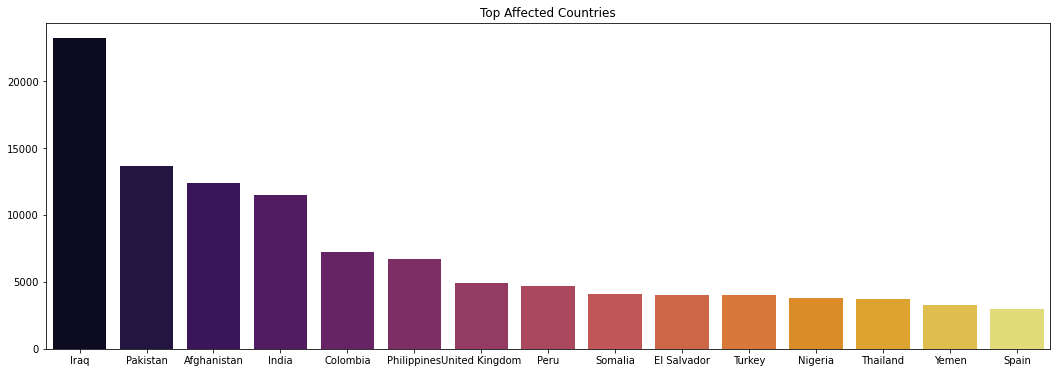

In [10]:
plt.subplots(figsize=(18,6))
sns.barplot(terror_df['Country'].value_counts()[:15].index,terror_df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [27]:
current_year = 2017
dff = terror_df[terror_df['Year'].eq(current_year)].sort_values(by='Casualities', ascending=False).head(5)
dff

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive,Casualities
179344,2017,10,1,United States,North America,Las Vegas,36.082645,-115.135925,Armed Assault,59.0,851.0,Security Guard: Jesus Campos,10/01/2017: An assailant opened fire from the ...,Anti-Government extremists,Business,Firearms,NaN,910.0
179671,2017,10,14,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,588.0,316.0,Hotel,10/14/2017: A suicide bomber detonated an expl...,Al-Shabaab,Business,Explosives,"The specific motive is unknown; however, sourc...",904.0
175415,2017,5,31,Afghanistan,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,93.0,491.0,Contractors,05/31/2017: A suicide bomber detonated an expl...,Khorasan Chapter of the Islamic State,Government (Diplomatic),Explosives,NaN,584.0
172117,2017,2,16,Pakistan,South Asia,Sehwan,26.421478,67.860947,Bombing/Explosion,91.0,351.0,Shrine,02/16/2017: A suicide bomber detonated at Lal ...,Khorasan Chapter of the Islamic State,Religious Figures/Institutions,Explosives,NaN,442.0
180708,2017,11,24,Egypt,Middle East & North Africa,Beir al-Abd,31.016779,33.008587,Bombing/Explosion,311.0,127.0,Mosque,11/24/2017: Assailants detonated an explosive ...,Sinai Province of the Islamic State,Religious Figures/Institutions,Explosives,The Sons of Jesus Movement claimed responsibil...,438.0


## Terrorist Activities By Region

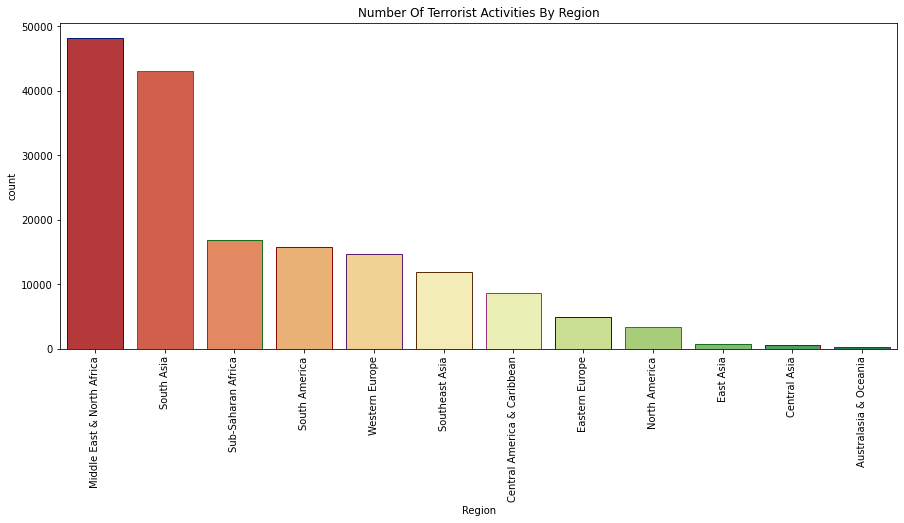

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror_df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror_df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

##### Middle East and North Africa regions have the highest attacks fiollowed by South Asia. Whereas Australia and Oceania have the least attacks.We can clearly observe that the highest attacks are in the Asian and African Continents.

## Most Notorious Group

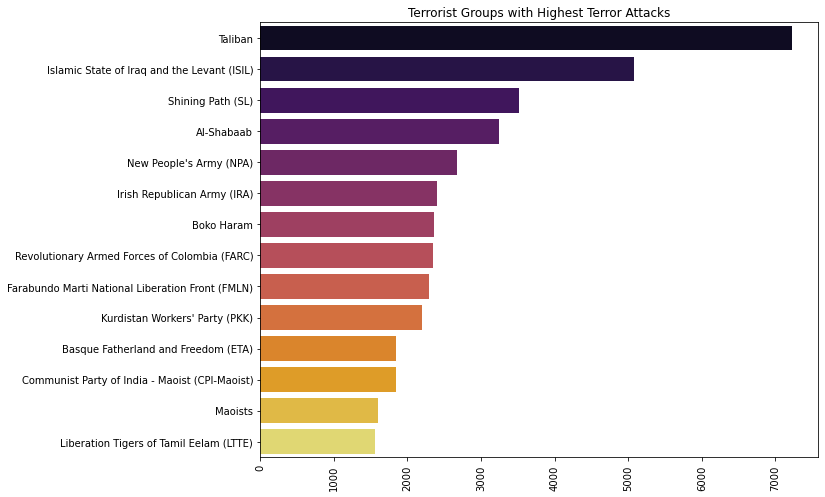

In [18]:
sns.barplot(terror_df['Group'].value_counts()[1:15].values,terror_df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## Activities of top 10 terrorist groups in past years.

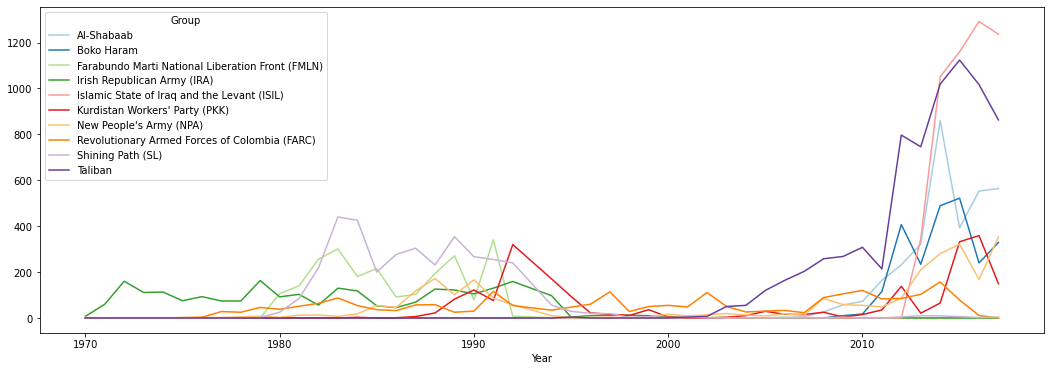

In [38]:
pd.crosstab(terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts()[1:11].index)]['Year'],terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts()[1:11].index)]['Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6));

###### Every terrorist group had its time peroid of activities and existance.
###### In 80's and starting of 90's Shining Path and FMLN were the most active terrorist groups.
###### Tabliban and ISIL came into existance after 2000 and 2012 resp.
###### ISIL grew strong in very short period of time.

## Favourite Target of Top 25 Most Notorious Group

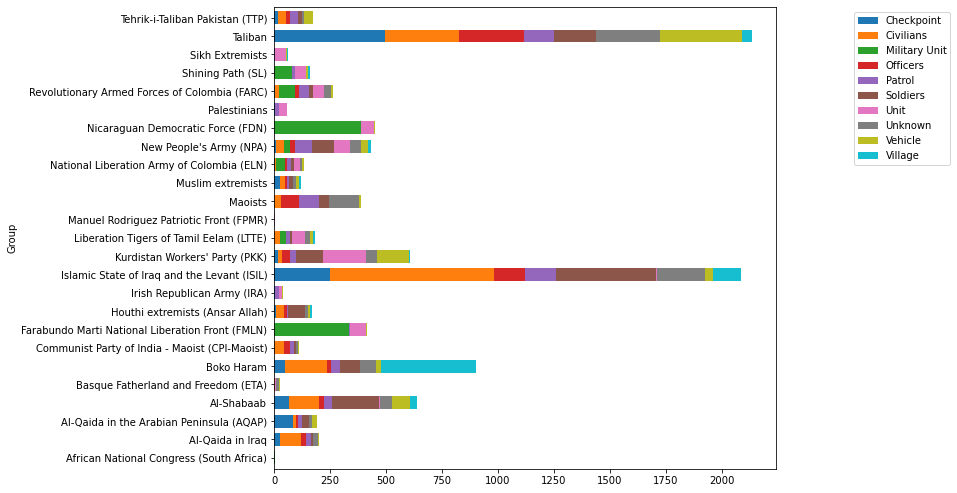

In [43]:
v1=terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts()[1:26].index)]
v2=v1[v1['Target'].isin(v1['Target'].value_counts()[0:10].index)]
pd.crosstab(v2['Group'],v2['Target']).plot.barh(stacked=True,figsize=(9,8.5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1));

###### Taliban mostly targetted Police, Millitary and Govt. while Citizens and Military were the major targets of ISIL.

## Atack Type

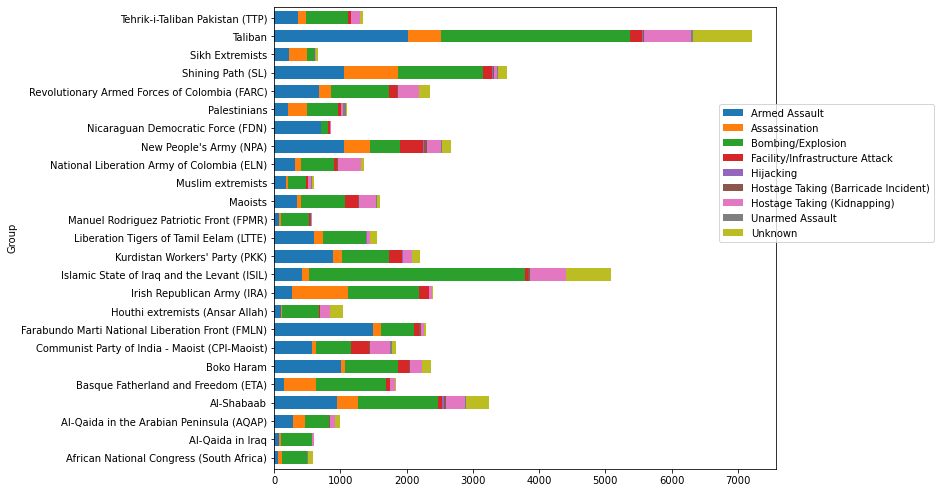

In [45]:
pd.crosstab(v1['Group'],v1['AttackType']).plot.barh(stacked=True,figsize=(9,8.5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.1,0.8));

###### ISIL was mainly involved in Bombing/Explosions while Taliban used Armed Assaults and Explosions both to spread its terror.
###### Shining Path did greater no. of Assassinations as compared to taliban and ISIL

## Weapon Types

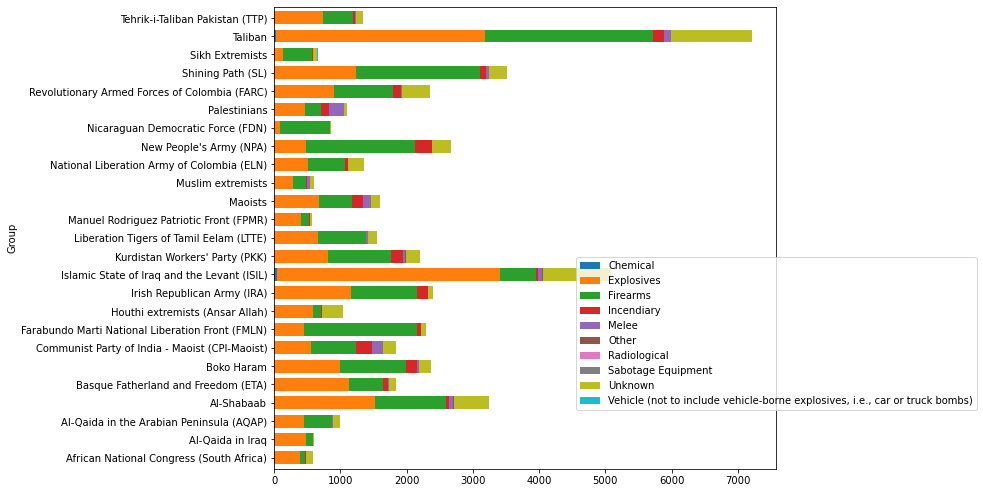

In [48]:
pd.crosstab(v1['Group'],v1['WeaponType']).plot.barh(stacked=True,figsize=(9,8.5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1,0.47));

###### Again we can see the love of ISIL for explosions
###### One more thing we can see here that only ISIL used Chemical weapons

## Countries whose Citizens has seen these violent acts of terror the most

In [56]:
terror_filter = terror_df[terror_df['TargetType'] == "Private Citizens & Property"]
terror_count = terror_filter.groupby(['Country'])['TargetType'].count()
countries = pd.DataFrame({'Country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['Country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['Country'],
    colorscale="Oranges",
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = {'title': 'No of incidents'},
)]
layout = dict(
    title='No of incidents across the world to disrupt Private Citizens & Property',
    geo=dict(showframe=False, projection=dict(type='mercator'),scope = 'world',
        showlakes=False,
        showcoastlines = False)
)
fig.layout.template = 'plotly_dark'
fig = go.Figure(data=data, layout=layout)
iplot(fig)

###### India , Pakistan and Afganistan has seen thousands of terrorists act